# Module 09: *k*-Nearest Neighbors

**Student Name**: [Brian Wong]

**Date**: [3/12/2025]

## Overview
The k-Nearest neighbor method is a type of instance based learning that uses existing data, with known labels, to predict the label for a new observation. The purpose of this exercise is to demonstrate the use of k-NN for classification using the [iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set). 


## Instructions

#### Use the notebook: `k-NN.ipynb` to perform the following:
Question 1. Load and Inspect the data

Question 2. Perform the k-nn analysis using different values of k. Recommend which value is more appropriate and justify your response.

Question 3. Evaluate the prediction accuracy of the k-nn model.

Question 4. Explore different metrics and data partitioning strategies.


### Submission Instructions

The `ipynb` format stores outputs from the last time you ran the notebook.  (When you open a notebook it has the figures and outputs of the last time you ran it too).  To ensure that your submitted `ipynb` file represents your latest code, make sure to give a fresh run `Kernel > Restart & Run All` just before uploading the `ipynb` file.

### Academic Integrity

**Writing your homework is an individual effort.**  You may discuss general python problems with other students but under no circumstances should you observe another student's code which was written for this assignment, from this year or past years.  Pop into office hours or DM us in MS Teams if you have a specific question about your work or if you would like another pair of eyes or talk through your code.

Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment. You do not need to cite the official python documentation.

**Documentation / style counts for credit**  Please refer to the Pep-8 style, to improve the readability and consistency of your Python code. For more information, read the following article [How to Write Beautiful Python Code With PEP 8](https://realpython.com/python-pep8/) or ask your TA's for tips.

**NOTE:<span style='color:red'> Write python expressions to answer ALL questions below and ensure that you use the `print()` function to display the output.</span>** Each question should be answered in a new code cell. For example, your solution for question 1.1 should be in a different code cell from your solution for question 1.2.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() 
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

## Question 1: Inspect the data
In this question you will need to load the data (this was performed for you), inspect the distribution and pairwise relationships between the features. 

In [5]:
#load the data from sklearn.datasets
data     = load_iris()

#divide the data into the input 'X' and the labels 'y'
X        = data['data'] #the observations
y        = data['target'] #the label

In [6]:
#load the data in a pandas dataframe
df          = pd.DataFrame(X, columns=['sepal length', 'sepal width', 'petal length', 'petal width'])
df['class'] = [data['target_names'][idx] for idx in y]

### Question 1.1 (5 pts)
Obtain a statistical summary of the iris flowers sepal and petal features. Use the statistical summary, explain your observation about the iris flowers. Note: You can use the `describe()` function to display the statistical summary.

In [8]:
# Statistical summary
df.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Each of the iris flower features have 150 separate data. 

Sepal length:
The minimum sepal length is 4.3 while the maximum is 7.9, and the average is 
5.84, which is closer towards the minimum than the maximum, but still close
to being in the middle. The median is 5.8, which is close to the mean, but is
still less than the mean so the distribution is close to being symmetric 
but has a right-skew. The standard deviation is also 0.83,
which suggests a moderate spread for the data.

Sepal width:
The minimum sepal width is 2 while the maximum is 4.4, and the average is
3.06, which is very close to being in the middle. The median is 3, which is
very close to the mean, so the distribution is close to being symmetric and is
slightly right skewed. The standard deviation is also 0.44, which suggests a moderate
spread for the data.

Petal length:
The minimum petal length is 1 while the maximum is 6.9, and the average is 
3.76, which is closer to the minimum by a lot. The median is 4.35, which is
not close to the mean and is actually greater than the mean, so the data may be
left-skewed. The standard deviation is 1.77, which suggests a high spread
or variability for the data.

Petal width:
The minimum petal width is 0.1 while the maximum is 2.5, and the average is 
1.20, which is close to being in the middle of the min and max. The median is 
1.3, which is close to the mean but is larger than the mean, so the data may be
left-skewed. The standard deviation is 0.76, which suggests a moderate to high spread
or variability for the data.

### Question 1.2 (10 pts)
Visualize and discuss the **distribution of each feature** and the **pairwise relationships between features**. Note: Ensure that you discuss the strength of the **correlation** between the features.

- Tip 1: the seaborn library has a pairplot visualization which is useful to display both the distribution of each feature and pairwise relationships.
- Tip 2: another useful visualization is called a correlation matrix. It can be used to visually display the strength of the correlation. 

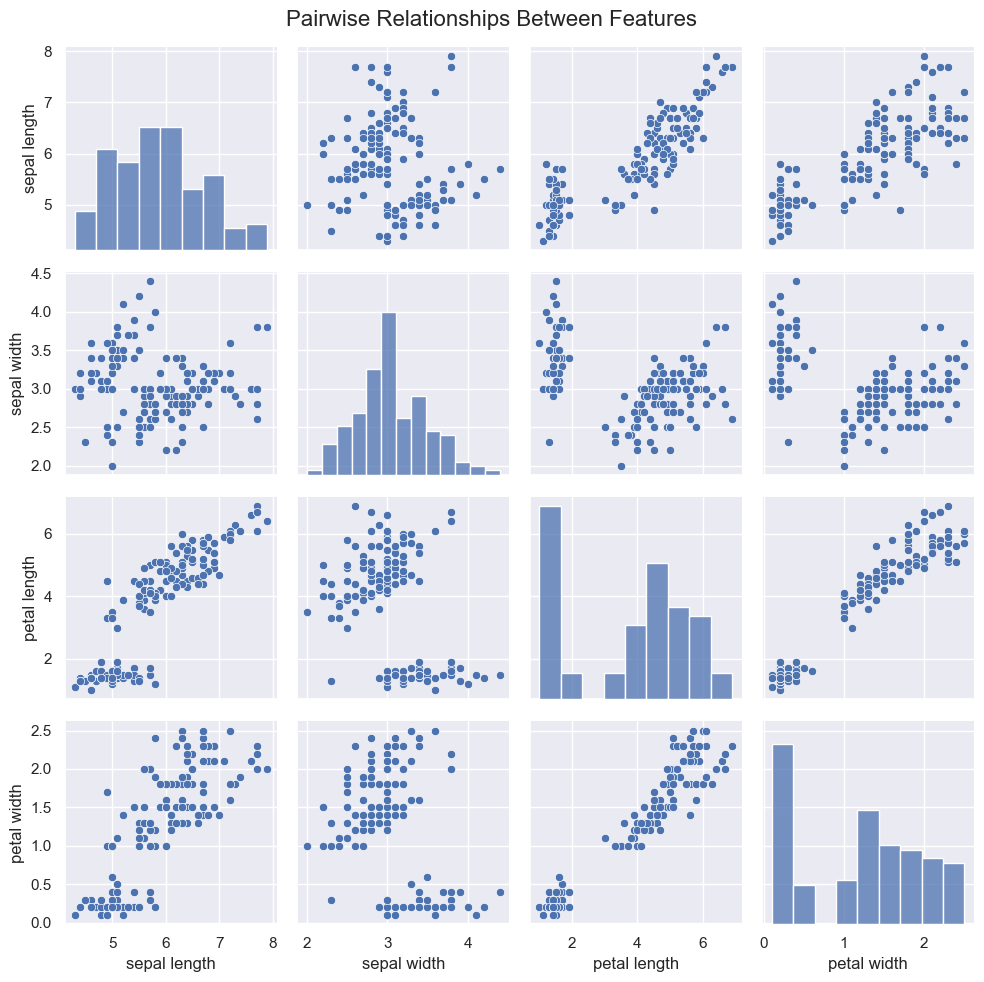

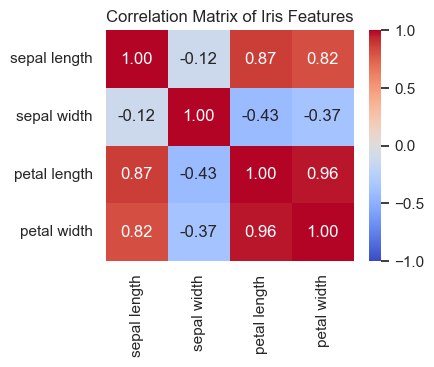

In [11]:
# Pairplot to visualize the distribution and pairwise relationships
sns.pairplot(df)
plt.suptitle('Pairwise Relationships Between Features', fontsize=16)
plt.tight_layout()
plt.show()

# Calculate the correlation matrix
corr_matrix = df[['sepal length', 'sepal width', 'petal length', 'petal width']].corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(4, 3))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)

# Add title and display the plot
plt.title('Correlation Matrix of Iris Features')
plt.show()

The bar graphs in the diagonal from the top left to bottom right represent the distribution of each feature.
The x-axes from left to right are sepal length, sepal width, petal length, and petal width.
The y-axes from top to bottom are sepal length, sepal width, petal length, and petal width.

For the bar graph visualizing the distribution of sepal length, it seems to be a multimodal
right-skewed distribution as there are multiple peaks and a tail on the right.

For the bar graph visualizing the distribution of sepal width, it seems to be a multimodal
right-skewed distribution as there are multiple peaks and a tail on the right.

For the bar graph visualizing the distribution of petal length, it seems to be a multimodal
left-skewed distribution as there are multiple peaks and a tail on the left that spikes up. 

For the bar graph visualizing the distribution of petal width, it seems to be a multimodal
left-skewed distribution as there are multiple peaks and a tail on the left that spikes up. 

Pairwise relationship between sepal length and sepal width:
Based on the scatterplot between these two features, it seems like there isn't a strong relationship
as the points are scattered throughout the graph with no clear correlation. This is supported by the 
correlation matrix as these two features have a correlation coefficient of -0.12, which is close to 0
thus indicating no strong relationship.


Pairwise relationship between sepal length and petal length:
Based on the scatterplot between these two features, it seems like there is a pretty strong relationship
since as one feature increases, the other feature also increases. This is most apparent when sepal length
is between 5.5 to 8 and petal length is 3 and 6.5. This is supported by the correlation matrix as these 
two features have a correlation coefficient of 0.87, which indicates a strong positive correlation.

Pairwise relationship between sepal length and petal width:
Based on the scatterplot between these two features, it seems like there is a pretty strong relationship
since as one feature increases, the other feature also increases. This is most apparent when sepal length
is between 5.5 to 8 and petal width is 1 to 2.5. This is supported by the correlation matrix as these
two features have a correlation coefficient of 0.82, which indicates a strong positive correlation.

Pairwise relationship between sepal width and petal length:
Based on the scatterplot between these two features, it seems like there is a moderate relationship since
as one feature increases, the other decreases. This is most apparent when petal length is the x-axis and
sepal width is the y-axis since as petal length increases, the sepal width values decrease. This is supported
by the correlation matrix as these two features have a correlation coefficient of -0.43, which indicates a 
moderate negative correlation.

Pairwise relationship between sepal width and petal width:
Based on the scatterplot between these two features, it seems like there is a moderate relationship since
as one feature increases, the other decreases. This is most apparent when petal width is the x-axis and
sepal width is the y-axis since as petal width increases, the sepal width decreases. This is supported by the 
correlation matrix as these two features have a correlation coefficient of -0.37, which indicates a 
moderate negative correlation.

Pairwise relationship between petal length and petal width:
Based on the scatterplot between these two features, it seems like there is an extremely strong relationship
since as one feature increases, the other also increases and it forms a clear line. This is supported by the
correlation matrix as these two features have a correlation coefficient of 0.96, which indicates an extremely 
strong positive correlation.

## Question 2: Choose *K* (25 pts)

Using the cell below, build a model to predict the target in the iris dataset using the k-NN algorithm. The program should try at least 20 different values of k and evaluate the accuracy of the predictions. After which, display a line graph showing the accuracy for each value of k. Evaluate the results from the graph and recommend the best value of *k*. 

`Note:` If multiple values of *k* are found to be suitable, weigh the pros and cons of choosing a large versus a small value of *k*.

In [14]:
#split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split( 
                                        #TODO: enter the appropriate values to partition the data, 
                                        #and ensure your results are reproducible
                                        #and obtain stratified samples
                                        X,
                                        y,
                                        test_size=0.3,
                                        random_state=7,
                                        stratify=y
                                        ) 

#build the k-nn model, experiment with different values of k and plot the results

# List to store accuracy for each value of k
accuracies = []
# List to store the k values tested
k_values = []

k=105
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracies.append(accuracy)
k_values.append(k)
print(f"Accuracy with k={k}: {accuracy:.2f}")

k=100
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracies.append(accuracy)
k_values.append(k)
print(f"Accuracy with k={k}: {accuracy:.2f}")

k=90
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracies.append(accuracy)
k_values.append(k)
print(f"Accuracy with k={k}: {accuracy:.2f}")

k=80
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracies.append(accuracy)
k_values.append(k)
print(f"Accuracy with k={k}: {accuracy:.2f}")

k=70
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracies.append(accuracy)
k_values.append(k)
print(f"Accuracy with k={k}: {accuracy:.2f}")

k=60
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracies.append(accuracy)
k_values.append(k)
print(f"Accuracy with k={k}: {accuracy:.2f}")

k=50
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracies.append(accuracy)
k_values.append(k)
print(f"Accuracy with k={k}: {accuracy:.2f}")

k=40
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracies.append(accuracy)
k_values.append(k)
print(f"Accuracy with k={k}: {accuracy:.2f}")

k=32
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracies.append(accuracy)
k_values.append(k)
print(f"Accuracy with k={k}: {accuracy:.2f}")

k=31
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracies.append(accuracy)
k_values.append(k)
print(f"Accuracy with k={k}: {accuracy:.2f}")

k=30
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracies.append(accuracy)
k_values.append(k)
print(f"Accuracy with k={k}: {accuracy:.2f}")

k=20
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracies.append(accuracy)
k_values.append(k)
print(f"Accuracy with k={k}: {accuracy:.2f}")

k=15
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracies.append(accuracy)
k_values.append(k)
print(f"Accuracy with k={k}: {accuracy:.2f}")

k=10
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracies.append(accuracy)
k_values.append(k)
print(f"Accuracy with k={k}: {accuracy:.2f}")

k=9
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracies.append(accuracy)
k_values.append(k)
print(f"Accuracy with k={k}: {accuracy:.2f}")

k=8
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracies.append(accuracy)
k_values.append(k)
print(f"Accuracy with k={k}: {accuracy:.2f}")

k=7
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracies.append(accuracy)
k_values.append(k)
print(f"Accuracy with k={k}: {accuracy:.2f}")

k=6
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracies.append(accuracy)
k_values.append(k)
print(f"Accuracy with k={k}: {accuracy:.2f}")

k=5
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracies.append(accuracy)
k_values.append(k)
print(f"Accuracy with k={k}: {accuracy:.2f}")

k=1
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracies.append(accuracy)
k_values.append(k)
print(f"Accuracy with k={k}: {accuracy:.2f}")

Accuracy with k=105: 0.33
Accuracy with k=100: 0.60
Accuracy with k=90: 0.60
Accuracy with k=80: 0.64
Accuracy with k=70: 0.64
Accuracy with k=60: 0.84
Accuracy with k=50: 0.82
Accuracy with k=40: 0.84
Accuracy with k=32: 0.91
Accuracy with k=31: 0.96
Accuracy with k=30: 0.93
Accuracy with k=20: 0.89
Accuracy with k=15: 0.96
Accuracy with k=10: 0.91
Accuracy with k=9: 0.96
Accuracy with k=8: 0.93
Accuracy with k=7: 0.96
Accuracy with k=6: 0.96
Accuracy with k=5: 0.96
Accuracy with k=1: 0.96


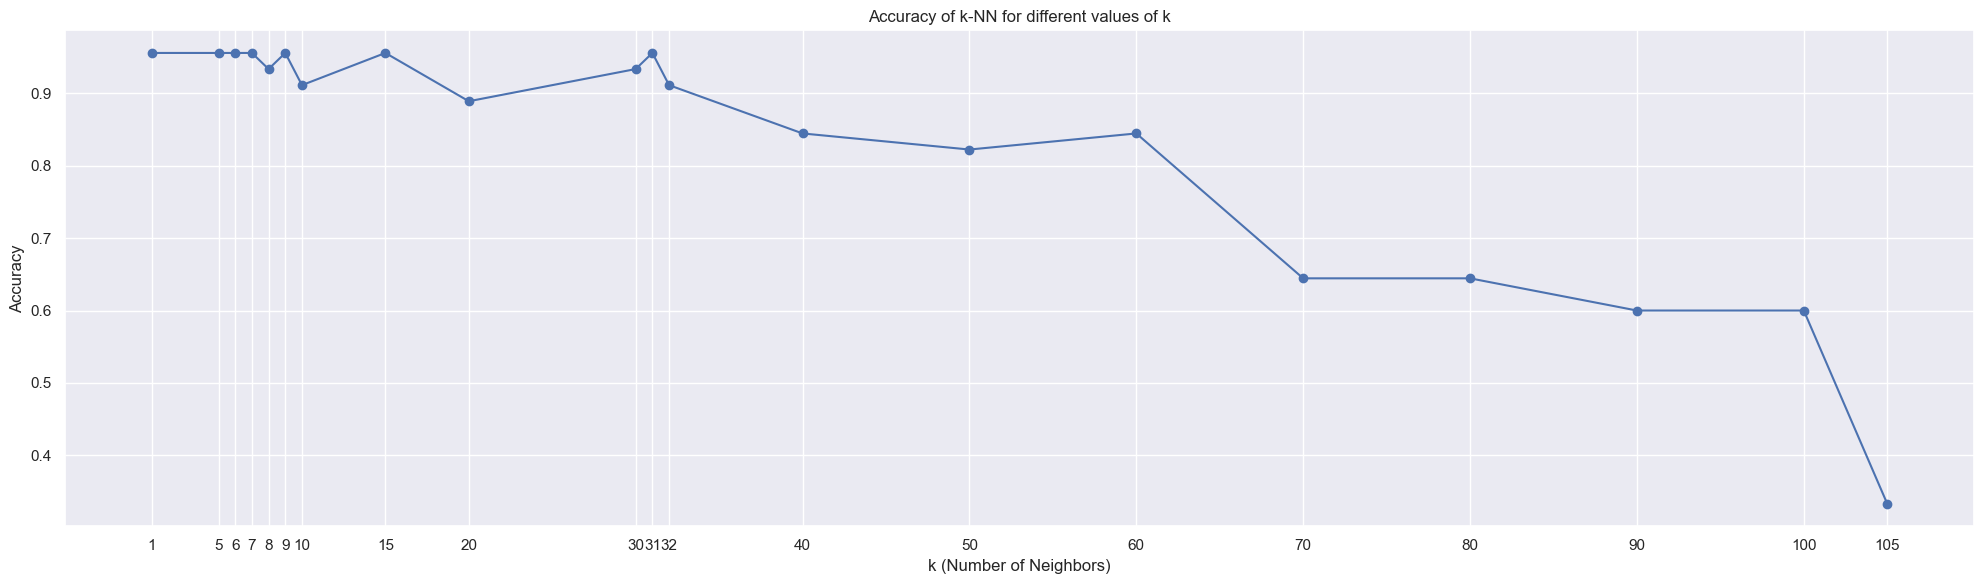

['setosa' 'versicolor' 'virginica']


In [15]:
# Plot the accuracy for each value of k
plt.figure(figsize=(20, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b')
plt.title("Accuracy of k-NN for different values of k")
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Accuracy")
plt.xticks(k_values)
plt.grid(True)
plt.xticks(k_values, rotation=0)
plt.tight_layout()
plt.show()

print(df['class'].unique())

Based on my experiment of finding a suitable value of k, it seems like as k increases, the accuracy decreases, and accuracy tends
to be higher when k is less than 32. The values of k that resulted in the highest accuracy were k = 1, 5, 6, 7, 9, 15, and 31.

There are 150 data points and 3 classes. If we choose k = 31, the largest suitable k, then it could lead to more stable predictions
since it would be less affected by outliers, but it might blur the class boundaries, which would cause misclassification of points
near the edges of different classes. If we choose k = 1, the smallest suitable k, then it would better capture small patterns and
details in the data, but it would be highly sensitive to outliers, so a good value of k would be somewhere in the middle where 
it won't be too sensitive to outliers and it won't blur class boundaries. Therefore, a good value of k would be 7 as it is in the
middle of the suitable values of k.

## Question 3: Evaluate the Results (5 pts)
Display the classification report for your recommended value of k. Evaluate the report and explain the results. 

In [19]:
# Train the model with the best k
model = KNeighborsClassifier(n_neighbors=7)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Generate classification report
report = classification_report(y_test, y_pred)
print(report)
print(data.target_names)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.93      0.93      0.93        15
           2       0.93      0.93      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45

['setosa' 'versicolor' 'virginica']


0 represents setosa, 1 represents versicolor, and 2 represents virginica. 

setosa had the highest precision of 1.00, so 100% of predictions for "0" were correct (it was always able to not label an instance as
"0" when it wasn't). The other two flowers had a precision of 0.93, so 93% of predictions for "1" and "2" were correct
(it was able to not label an instance as "1" 93% of the time when it wasn't, and it was able to not label an instance as "2" 93% of the
time when it wasn't).

setosa had the highest recall of 1.00, which means that it was always able to find all positive instances (it was always able to always
classify a setosa as setosa). The other two flowers had a recall of 0.93, so they were able to find 93% of all positive instances
(it was able to classify versicolor as versicolor 93% of the time, and it was able to classify virginica as virginica 93% of the time).

setosa had the highest f1-score of 1.00, which means that 100% of positive predictions were correct. The other two flowers had a f1-score
of 0.93, which means that 93% of positive predicitons were correct.

Each flower had a support of 15, so they each had 15 data points.

The support for accuracy, marcro avg, and weighted avg are 45, which means they all used 45 data points.

The overall percentage of correctly classified instances is 96%, so 0.04 is incorrectly classified.

The macro average is the same as the weighted average since they use the same amount of data points, and
they both have .96, which is calculated as the average of precision, recall, and f1-score across all flowers, so
the precision, recall, and f1-score are all close to 100%.

## Question 4: Model Evaluation (5 pts)
Answer the following question using a markdown cell.

1. Research the difference between accuracy, precision, and recall. For each metric, provide an example that explains when you would choose one metric over the others.
2. In the lecture we discussed one method to partition your dataset using a train-test split. Identify another approach that can be used to partition your dataset and explain how it works.

`Note``: you do not need to implement code for questions 4.1 and 4.2

Question 4.1
Accuracy: The percentage of classifications by the model that is correct overall.
If you are trying to classify different flower species and each class has around
the same number of samples, so it's balanced, and care about the overall model's
ability to be correct and not its ability to predict a specific class,
then you might choose accuracy.

Precision: How often the model is correct when predicting the target class.
If you are building a spam filter for emails, and you don't want to filter out
important emails a user might receive, so you would care about the precision of
the model to catch only real spam to create a good user experience, then
you might choose precision.

Recall: How often the model can find all instances of the target class.
If you are trying to determine if a medical condition is severe, then you
wouldn't want false negatives errors (classifying a medication condition that is
severe as not severe) since it would be harmful for the person with the
medical condition, so you would want to find all instances of a target class,
whether it is true positive or false negative. Thus, if you want to find 
all instances of a target class, then you would choose recall.

Question 4.2
Anotyher approach that can be used to partition my dataset is by using the k-fold cross-validation.
It works by splitting the dataset into k subsets, and training the model on k-1 of the fold
and testing the model on the last remaining fold. This process would then be repeated k times
and the model would use a different fold as the test each time.

## Resources / References
Share any resources that were helpful in your response for question 4. 

https://encord.com/blog/classification-metrics-accuracy-precision-recall/ <br>
https://www.kaggle.com/discussions/general/448072